In [1]:
import matplotlib.pyplot as plt
import numpy as np
import parameters 
import device 
import network
import numpy as np

/home/asude/.local/lib/python3.8/site-packages/samna
finished bindings


In [2]:
dynapse = device.DynapseDevice(sender_port=12321, receiver_port=12322)
model = dynapse.model

[0]:  Bus 1 Device 63 Dynapse1DevKit serial_number 00000032
[1]:  Bus 1 Device 58 Dynapse1DevKit serial_number 00000000
[2]:  Bus 1 Device 60 Dynapse1DevKit serial_number 00000011
[3]:  Bus 1 Device 62 Dynapse1DevKit serial_number 00000007
[4]:  Bus 1 Device 61 Dynapse1DevKit serial_number 00000020
[5]:  Bus 1 Device 57 Dynapse1DevKit serial_number 00000033
Sender port: tcp://0.0.0.0:12321
Receiver port: tcp://0.0.0.0:12322
Opened device name: my_dynapse1
SamnaNode ID: 1
PythonNode ID: 2


In [3]:
num_neurons = 8
neuron_ids = np.arange(1,num_neurons+1)

# init a network generator
net = network.DynapseNetworkGenerator()
neurons = net.get_neurons(0, 0, neuron_ids)

net.add_connections_all_to_all(neurons, neurons, network.SYNAPSE_AMPA, weight=1, probability=0.8)

dynapse.monitor_neuron_network(neurons)
model.apply_configuration(net.get_config())

Checking if the given network is valid to be deployed on DYNAP-SE1 chips...
Validation complete: the network is good to go!
Converted the validated network to a Dynapse1 configuration!


Population frequency for DC current (3, 0) is 30.250000 Hz.
Population frequency for DC current (3, 10) is 30.875000 Hz.
Population frequency for DC current (3, 20) is 31.000000 Hz.
Population frequency for DC current (3, 30) is 31.250000 Hz.
Population frequency for DC current (3, 40) is 31.500000 Hz.
Population frequency for DC current (3, 50) is 31.750000 Hz.
Population frequency for DC current (3, 60) is 33.250000 Hz.
Population frequency for DC current (3, 70) is 33.625000 Hz.
Population frequency for DC current (3, 80) is 34.000000 Hz.
Population frequency for DC current (3, 90) is 34.000000 Hz.
Population frequency for DC current (3, 100) is 33.875000 Hz.
Population frequency for DC current (3, 110) is 33.000000 Hz.
Population frequency for DC current (3, 120) is 33.375000 Hz.
Population frequency for DC current (3, 130) is 34.500000 Hz.
Population frequency for DC current (3, 140) is 34.750000 Hz.
Population frequency for DC current (3, 150) is 34.750000 Hz.
Population frequenc

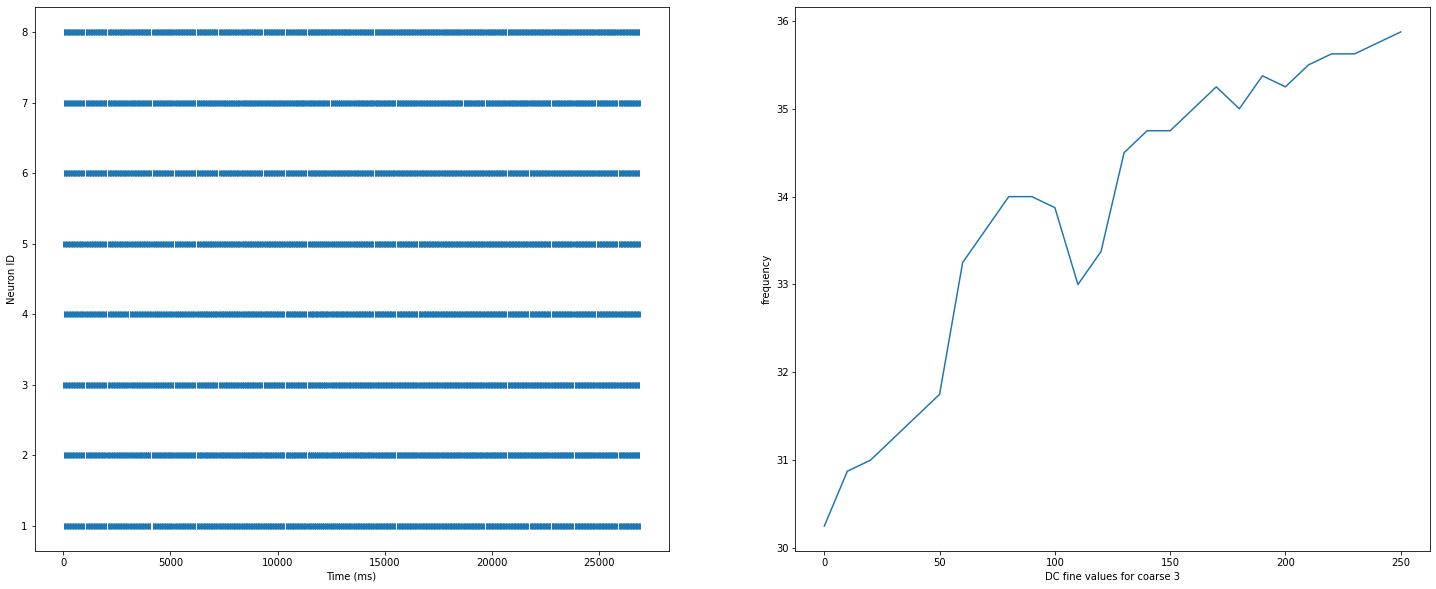

In [8]:
# # set params
parameters.set_all_default_params(model)
parameters.set_param(model, parameters.NEURON_DC_INPUT, (3,0), 0, 0)
parameters.set_param(model, parameters.AMPA_WEIGHT, (7, 50), 0, 0)
#parameters.set_param(model, parameters.AMPA_TIME_CONSTANT, (2,80), 0, 0)

# parameters.set_param(model, parameters.ADAPTATION_CASCODE, (5,150), 0, 0)
# parameters.set_param(model, parameters.ADAPTATION_WEIGHT, (6,130), 0, 0)

# parameters.set_param(model, parameters.ADAPTATION_TIME_CONSTANT, (3,100), 0, 0)
# parameters.set_param(model, parameters.ADAPTATION_GAIN, (4,125), 0, 0)
vary = np.arange(0, 255, 10)
duration = 1
spikes = []
all_pop_freqs = []
all_freqs = []

dynapse.start_graph()
dynapse.run_simulation(0.1) # bug with clearing the buffer at the moment - need to run the simulation for a little 
for c in vary: 
    parameters.set_param(model, parameters.NEURON_DC_INPUT, (3, c), 0, 0)
    these_spikes = dynapse.run_simulation(duration)
    spikes_array = np.vstack(([spike.timestamp for spike in these_spikes],[spike.id for spike in these_spikes])).T
    # sorted_spikes_array = np.sort(spikes_array, axis=0)
    # freqs = []
    # for neuron_id in neuron_ids:
    #     where_id = np.where(spikes_array[:,1] == neuron_id)
    #     neuron_id_freq = 1e6/np.diff(spikes_array[where_id,0]) # in sec 
    #     neuron_id_freq = neuron_id_freq[0]
    #     freqs.append(neuron_id_freq)
    # all_freqs += freqs
    
    #     plt.plot(neuron_id_freq, label = 'id %s' %neuron_id)
    # plt.legend()
    # arrage_spikes = [ for neuron_id in neuron_ids]
    pop_freq = len(spikes_array)/duration/num_neurons
    print('Population frequency for DC current (3, %d) is %f Hz.' %(c, pop_freq))
    all_pop_freqs.append(pop_freq)
    spikes += these_spikes

    # dynapse.run_simulation(duration+3)

dynapse.stop_graph()

spikes = np.vstack(([spike.timestamp for spike in spikes],[spike.id for spike in spikes])).T
spikes[:,0] -= spikes[0,0]

# spikes_array = np.vstack(([spike.timestamp for spike in spikes],[spike.id for spike in spikes])).T

fig, axs = plt.subplots(1,2,figsize=(25,10))
axs[0].plot(spikes[:,0]/1000, spikes[:,1], '|')
axs[1].plot(vary, all_pop_freqs)
axs[0].set_ylabel('Neuron ID')
axs[0].set_xlabel('Time (ms)')
axs[1].set_ylabel('frequency')
axs[1].set_xlabel('DC fine values for coarse 3')
plt.show()


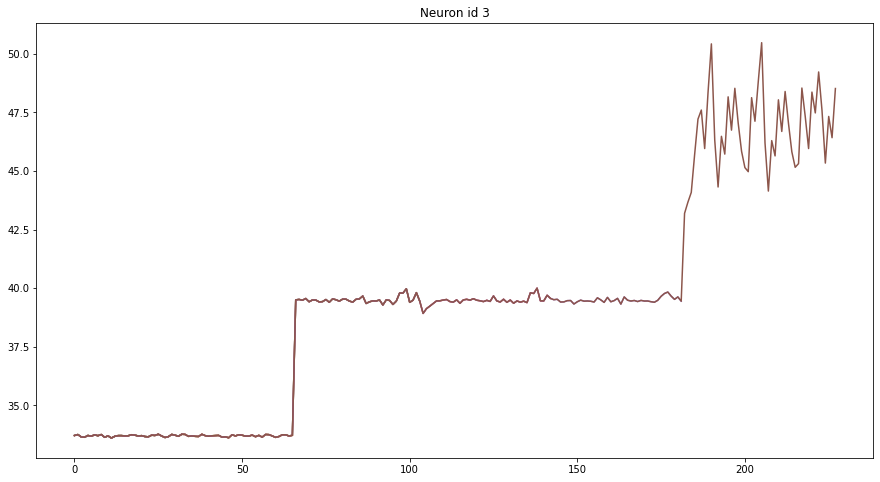

In [86]:
def plot_neuron_id_rate(neuron_id, num_neurons, all_freqs):
    plt.figure(figsize=[15,8])
    iter = int(len(all_freqs)/num_neurons)
    rates =[]
    for i in range(iter):
        i +=1 
        f = all_freqs[int(i*neuron_id-1)]
        rates += f.tolist()
        plt.plot(rates)
    plt.title('Neuron id %s' %neuron_id)
    return

plot_neuron_id_rate(3, num_neurons, all_freqs)

In [83]:
f0 = all_freqs[0]
l0 = f0.tolist()
f1 = all_freqs[1]
l1 = f1.tolist()
print(l0)
print(l0+l1)

[33.68137420006736, 33.74616137414369, 33.605538192694155, 33.63492650768558, 33.72681281618887, 33.70748643273671, 33.684777848890086, 33.734777181796716, 33.7108953613808, 33.64058400053825, 33.70521419663622, 33.655302392892, 33.66663300003367, 33.69726378218089, 33.662099841788134, 33.68591255137102, 33.76211215773659, 33.654169751632224, 33.738191632928476, 33.656435110393105, 33.78150124991554, 33.650772285223944, 33.67910548295837, 33.80434047731729, 33.704078193461406, 33.62927091740651, 33.656435110393105, 33.68364322285098, 33.689317117542025, 33.72908796546142, 33.68364322285098, 33.72908796546142]
[33.68137420006736, 33.74616137414369, 33.605538192694155, 33.63492650768558, 33.72681281618887, 33.70748643273671, 33.684777848890086, 33.734777181796716, 33.7108953613808, 33.64058400053825, 33.70521419663622, 33.655302392892, 33.66663300003367, 33.69726378218089, 33.662099841788134, 33.68591255137102, 33.76211215773659, 33.654169751632224, 33.738191632928476, 33.656435110393105

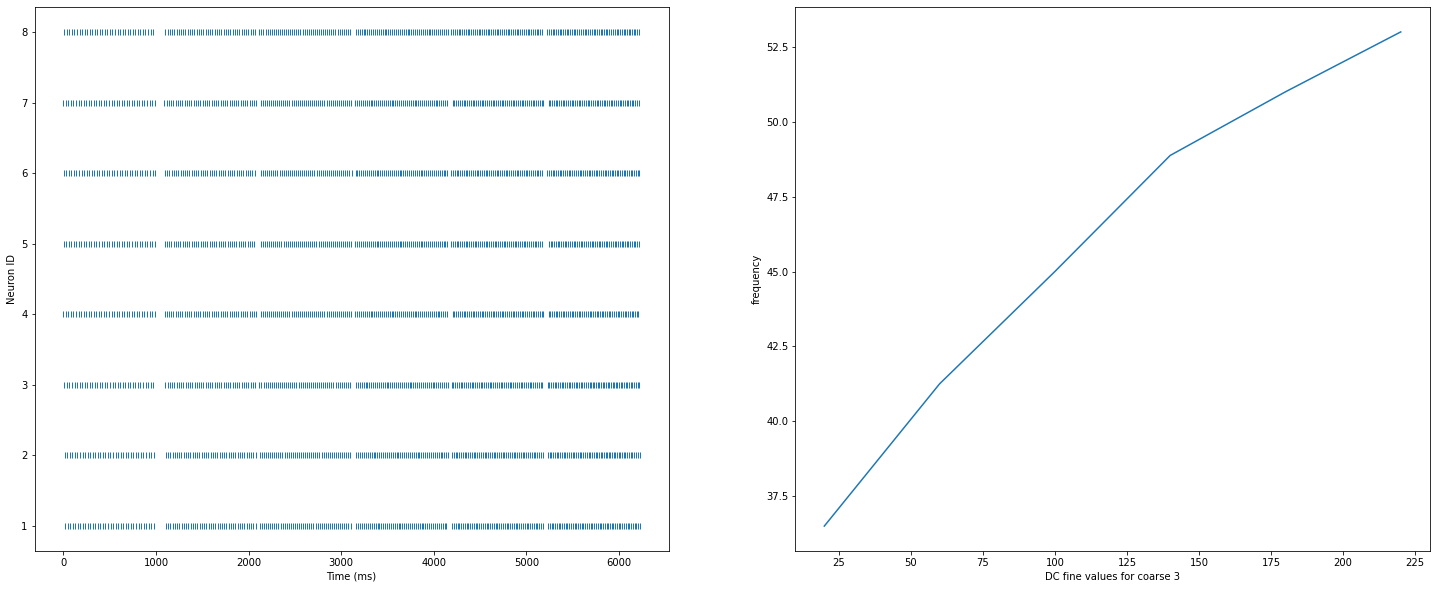

In [37]:
fig, axs = plt.subplots(1,2,figsize=(25,10))
axs[0].plot(spikes[:,0]/1000, spikes[:,1], '|')
axs[1].plot(vary, all_pop_freqs)
axs[0].set_ylabel('Neuron ID')
axs[0].set_xlabel('Time (ms)')
axs[1].set_ylabel('frequency')
axs[1].set_xlabel('DC fine values for coarse 3')
plt.show()

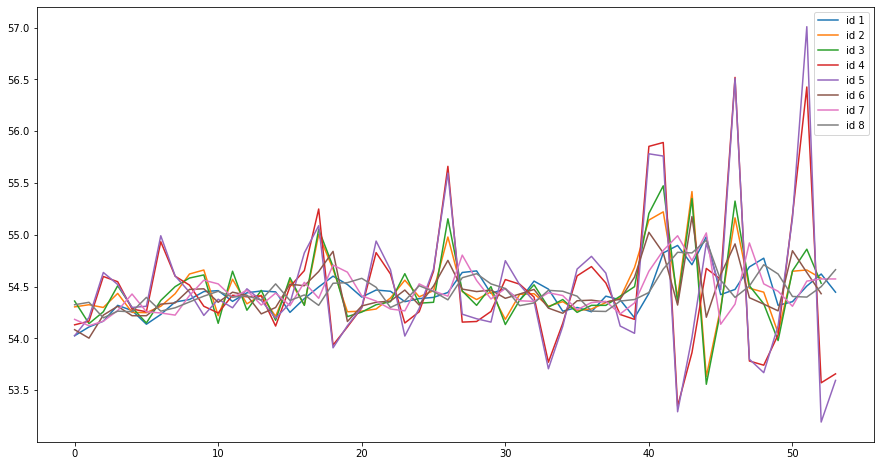

In [34]:
sorted_spikes_array = np.sort(spikes_array, axis=0)

plt.figure(figsize=[15,8])
for neuron_id in neuron_ids:
    where_id = np.where(spikes_array[:,1] == neuron_id)
    neuron_id_freq = 1e6/np.diff(spikes_array[where_id,0]) # in sec 
    neuron_id_freq = neuron_id_freq[0]
    plt.plot(neuron_id_freq, label = 'id %s' %neuron_id)
plt.legend()




# print(spikes_array[:,0])

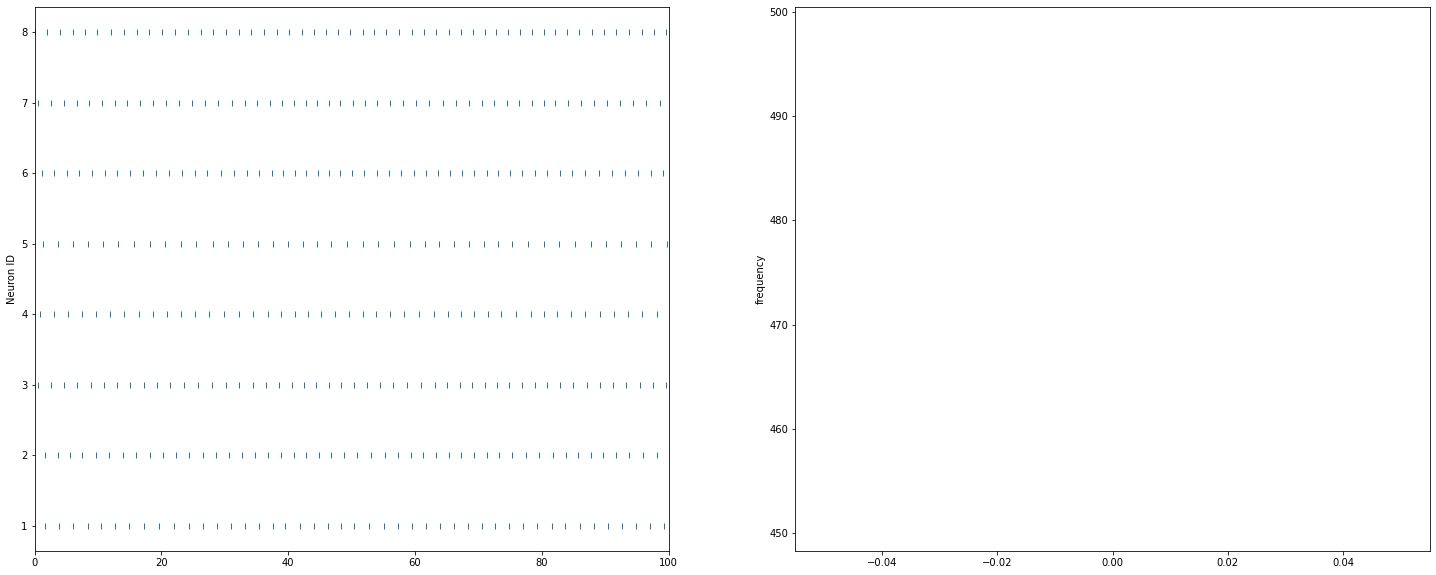

In [61]:
fig, axs = plt.subplots(1,2,figsize=(25,10))
axs[0].plot(spikes_array[:,0]/1000, spikes_array[:,1], '|')
axs[1].plot(pop_spikes)
axs[0].set_xlim([0,100])
axs[0].set_ylabel('Neuron ID')
axs[1].set_ylabel('frequency')
plt.show()

In [82]:
print(spikes[:,1])

[2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1
 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7
 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4
 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3
 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2
 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6
 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8
 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5
 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1
 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7
 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4
 5 2 7 8 3 1 6 4 5 2 7 8 3 1 6 4 5 2 7 8 3]
